In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# set fresh env for keras install Python >= 3.9 | TensorFlow = Version: 2.14.0 | Keras-ocr = Version: 0.9.2
import os, sys
sys.path.append('../scripts/')
import keras_ocr
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# not setup with cuda yet

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
2/2 [==============================] - 2s 177ms/step


<Axes: >

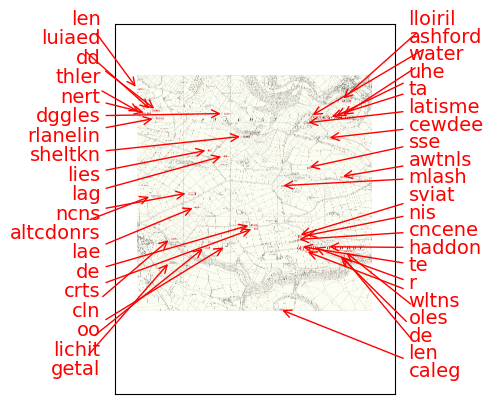

In [40]:
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read("../content/tifs/189226695.27.tif")
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [41]:
df = pd.DataFrame(prediction_groups)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,"(len, [[720.5625, 2047.3125], [880.6875, 2047....","(lloiril, [[7182.75, 2401.875], [7457.25, 2401...","(luiaed, [[1166.625, 2722.125], [1315.3125, 27...","(dd, [[1326.75, 2722.125], [1429.6875, 2722.12...","(thler, [[846.375, 2813.625], [983.625, 2813.6...","(nert, [[1006.5, 2813.625], [1132.3125, 2813.6...","(dggles, [[3454.125, 2825.0625], [3602.8125, 2...","(ashford, [[6199.125, 2916.5625], [6759.5625, ...","(water, [[7171.3125, 2916.5625], [7594.5, 2916...","(uhe, [[6942.5625, 2939.4375], [7137.0, 2939.4...",...,"(haddon, [[6711.707, 7045.555], [7890.7593, 70...","(te, [[5878.875, 7034.0625], [6290.625, 7034.0...","(lichit, [[2859.375, 7056.9375], [2996.625, 70...","(r, [[6279.1875, 7045.5], [6439.3125, 7045.5],...","(wltns, [[6039.0, 7182.75], [6256.3125, 7182.7...","(oles, [[7274.25, 7182.75], [7434.375, 7182.75...","(de, [[7102.6875, 7297.125], [7194.1875, 7297....","(len, [[7182.75, 7308.5625], [7274.25, 7308.56...","(getal, [[1749.9375, 7525.875], [1898.625, 752...","(caleg, [[5226.9375, 9024.1875], [5375.625, 90..."


### Test on Patchify

In [4]:
# test on 5 sample patches
images = [
    keras_ocr.tools.read(img) for img in ["../content/tifs/patches/patch-0-2000-500-2500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-1500-3500-2000-4000-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-2000-4000-2500-4500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-4500-6000-5000-6500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-7000-5000-7448-5500-#189226695.27_clip.tif#.png"]]

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
2/2 [==============================] - 2s 404ms/step


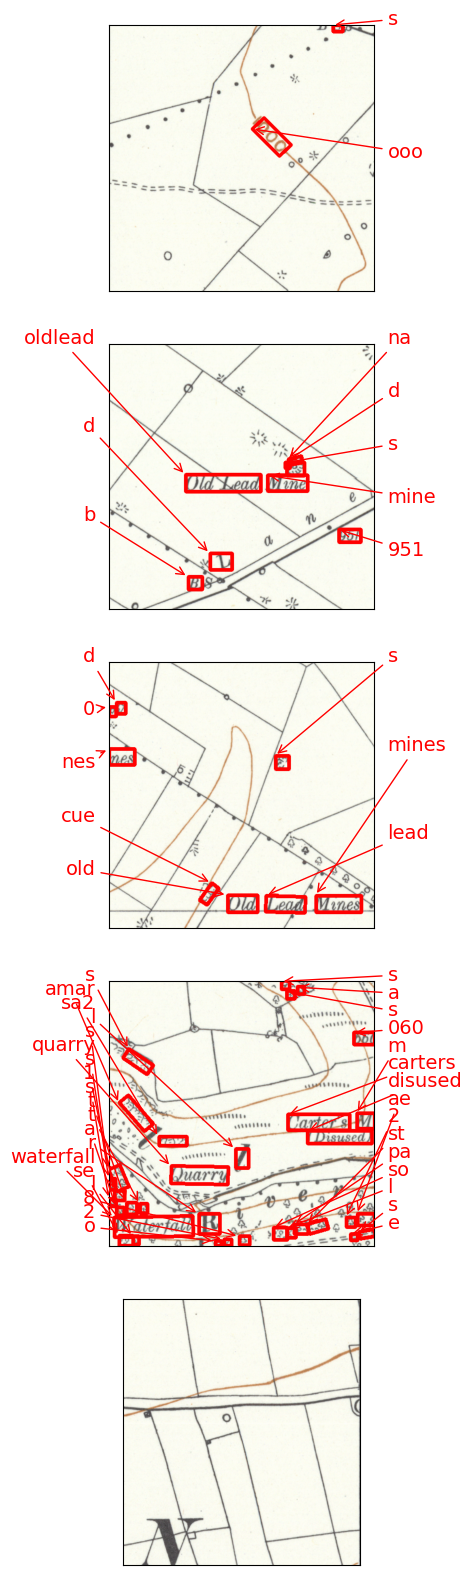

In [6]:
pipeline = keras_ocr.pipeline.Pipeline()
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)